# What's Cooking

kaggle의 What's Cooking이라고 하는 데이터를 이용해보겠습니다.

What's Cooking은 식재료를 가지고 어떤 나라의 음식인지를 맞추는 경연입니다.

- https://www.kaggle.com/c/whats-cooking

(요리 x 식재료) 행렬을 이용해 요리 간의 유사도를 측정하고, 이를 통해 음식의 국적을 알아맞히는 실습을 해보겠습니다.

## 데이터 불러오기

데이터는 캐글에서 받을 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cooking = pd.read_json("./data/cooking.json")
cooking.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


## 데이터 탐색

데이터는 id, cuisine, ingredients로 이루어져 있습니다. 여기서 id는 데이터를 관리할 목적으로 각 데이터마다 고유한 값을 하나씩 부여한 것입니다.

In [2]:
# 누락값이 없습니다.
cooking.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [3]:
# 국가별 데이터 개수입니다.
cooking['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

이번에는 각 음식 재료가 몇 가지 요리에 사용되었는지를 보겠습니다. 그러기 위해 리스트 내포 구문을 이용했습니다.

- 리스트 내포: https://wikidocs.net/22#_1

In [4]:
ingredients = pd.Series([ingredient for cuisine in cooking['ingredients'] for ingredient in cuisine])
ingredients_counts = ingredients.value_counts()
ingredients_counts

salt                                      18049
onions                                     7972
olive oil                                  7972
water                                      7457
garlic                                     7380
                                          ...  
cherry vanilla ice cream                      1
Nielsen-Massey Vanilla Extract                1
skinless boneless turkey breast halves        1
Martha White Cornbread Mix                    1
Mission Yellow Corn Tortillas                 1
Length: 6714, dtype: int64

많이 쓰이는 식재료와 그렇지 않은 식재료 간의 차이가 큽니다. salt가 사용된 음식이 45%에 달합니다.

In [5]:
ingredients_counts / len(cooking) * 100

salt                                      45.378891
onions                                    20.043244
olive oil                                 20.043244
water                                     18.748429
garlic                                    18.554835
                                            ...    
cherry vanilla ice cream                   0.002514
Nielsen-Massey Vanilla Extract             0.002514
skinless boneless turkey breast halves     0.002514
Martha White Cornbread Mix                 0.002514
Mission Yellow Corn Tortillas              0.002514
Length: 6714, dtype: float64

식재료별 사용 횟수를 그래프로 그렸습니다. 왼쪽 그림을 보면, salt의 압도적인 비중 때문에 그래프가 거의 직각을 이루고 있습니다. 하지만 자주 사용되는 재료 200개를 제외하고 보더라도, 여러 요리에 많이 쓰인 재료와 그렇지 않은 재료 간의 차이는 큽니다.

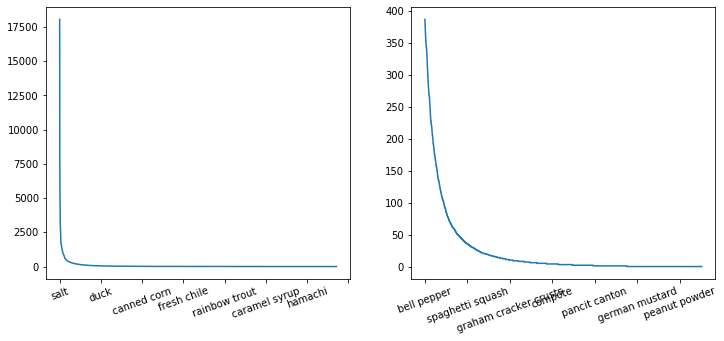

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ingredients_counts.plot()
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
ingredients_counts.iloc[200:].plot()
plt.xticks(rotation=20)

plt.show()

## 테스트 세트 나눠주기

1주차에서 사용한 `sklearn.model_selection.train_test_split` 함수를 다시 이용해 테스트 세트를 떼어내겠습니다. 이때 단순히 랜덤하게 테스트 세트를 떼어내지 않고, `cuisine`의 카테고리 별 비율이 일정하게 되도록 떼어내겠습니다. 이를 계층적 샘플링(stratified sampling)이라 합니다. 이는 테스트 세트가 전체 데이터 셋에 있는 여러 `cuisine` 카테고리를 잘 대표하도록 만들기 위해서입니다.

In [7]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(cooking['ingredients'], cooking['cuisine'], 
                                       test_size=0.2, 
                                       stratify=cooking['cuisine'], # 카테고리별 비율이 일정하게 만든다.
                                       random_state=1)


In [8]:
# 데이터 전체에서 각 국가가 차지하는 비율
cooking['cuisine'].value_counts() / len(cooking['cuisine']) * 100

italian         19.706341
mexican         16.186453
southern_us     10.861367
indian           7.550158
chinese          6.720471
french           6.652587
cajun_creole     3.886961
thai             3.869362
japanese         3.577714
greek            2.954191
spanish          2.486549
korean           2.086790
vietnamese       2.074219
moroccan         2.064163
british          2.021421
filipino         1.898225
irish            1.676975
jamaican         1.322472
russian          1.229446
brazilian        1.174134
Name: cuisine, dtype: float64

In [9]:
# 훈련 세트에서 각 국가가 차지하는 비율
# 전체 데이터 셋과 비슷한 비율로 훈련 세트와 테스트 세트가 나뉘었다.
y_trainset.value_counts() / len(y_trainset) * 100

italian         19.705208
mexican         16.185298
southern_us     10.861435
indian           7.548949
chinese          6.719256
french           6.653257
cajun_creole     3.887614
thai             3.868758
japanese         3.579622
greek            2.954210
spanish          2.485936
korean           2.086803
vietnamese       2.074232
moroccan         2.064804
british          2.020805
filipino         1.898237
irish            1.678243
jamaican         1.323109
russian          1.228826
brazilian        1.175398
Name: cuisine, dtype: float64

In [10]:
# 테스트 세트는 전체의 약 20%입니다.
len(X_testset) / (len(X_trainset) + len(X_testset)) * 100

20.000502841051944

# 요리 벡터화 하기

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# 문서-단어 행렬을 만든 것과 같은 방식으로 요리를 벡터화합니다.
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X_train = vectorizer.fit_transform(X_trainset).toarray()
X_test = vectorizer.transform(X_testset).toarray()

In [26]:
# 국가마다 번호를 붙여주겠습니다.
country  = np.unique(y_trainset)
country_to_id = {c:i for i, c in enumerate(country)}

y_train = np.array([country_to_id[x] for x in y_trainset])
y_test = np.array([country_to_id[x] for x in y_testset])

In [27]:
from sklearn.metrics.pairwise import cosine_distances

class KNNClassifier():
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, k=1, dists=None):
        if dists is None:
            dists = self._compute_distance(X)
        return self._predict_labels(dists, k)
        
    def _compute_distance(self, X):
        return cosine_distances(X, self.X_train)
    
    def _predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = self.y_train[np.argsort(dists[i])[:k]]
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [28]:
classifier = KNNClassifier()
classifier.fit(X_train, y_train)
dists = cosine_distances(X_test, X_train)

# 시간이 오래 걸립니다.
acc = []
for k in [1, 5, 9, 13, 17]:
    y_pred = classifier.predict(X_test, k, dists)
    acc.append(np.sum(y_test == y_pred) / len(y_test))

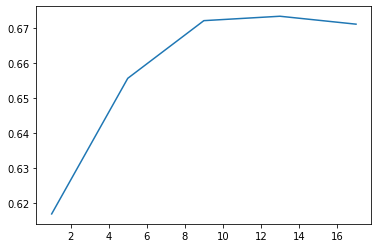

In [30]:
import matplotlib.pyplot as plt

plt.plot([1, 5, 9, 13, 17], acc)
plt.show()

## TF-IDF

데이터 탐색 단계에서 봤듯이, 특정 식재료가 높은 비중을 차지하고 있습니다. 이건 모델 성능에 문제가 될 소지가 있습니다. 예를 들어 소금은 전체 요리의 약 45%를 차지하고 있습니다. 이런 경우 "소금이 요리에 포함되어 있다"는 특성은 어느 국적의 요리인지를 구분하는 데 그다지 도움이 되는 특성이 아니게 됩니다.

그러므로 여러 요리에 걸쳐 자주 쓰이는 식재료는 가중치를 적게 주는 것이 바람직합니다. 지금은 소금이 포함되면 해당 특성이 +1이 됐지만, 이를 +0.8이나 +0.5 쯤으로 조정해주는 것입니다. 이렇게 해주면 소금이 포함된 음식끼리 거리가 가까워지기는 하지만 그 정도가 덜해집니다.

이 아이디어를 구현한 게 TF-IDF입니다. TF-IDF는 "Term Frequency - Inverse Document Frequency"의 약자입니다. Term Frequency는 우리가 지금까지 계산했던 문서-단어 행렬을 말합니다. 문서에 단어의 빈도수만큼 +1을 한 행렬입니다. 반면 Document Frequency는 전체 문서에 몇 번 등장했는가를 말합니다. Document Frequency에 역수를 취해주고(0으로 나눠지는 일이 없도록 분모에 +1을 합니다), 값이 너무 튀지 않도록 log를 취해준 것이 IDF입니다. TF와 IDF를 곱한 것이 TF-IDF입니다.

<br>
<center>$idf(t) = log\frac{n}{1+df(t)}$</center>
    
- $n$ : 전체 문서의 개수
- $t$ : 특정 단어
- $df$: 문서 빈도



In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X_train = vectorizer.fit_transform(X_trainset).toarray()
X_test = vectorizer.transform(X_testset).toarray()

In [56]:
classifier = KNNClassifier()
classifier.fit(X_train, y_train)
dists = cosine_distances(X_test, X_train)

acc = []
for k in [1, 5, 9, 13, 17]:
    y_pred = classifier.predict(X_test, k, dists)
    acc.append(np.sum(y_test == y_pred) / len(y_test))

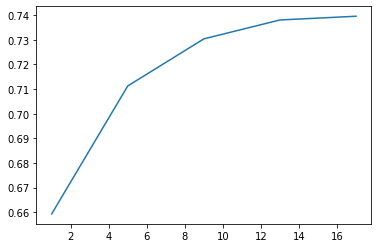

In [57]:
import matplotlib.pyplot as plt

# 성능이 향상된 것을 볼 수 있습니다.
plt.plot([1, 5, 9, 13, 17], acc)
plt.show()

# 오류 분석

혼동 행렬을 만들어보겠습니다. 혼동 행렬을 $M$이라고 할 때, $M[i, j]$ 값은 국적 id가 $i$인 요리에 대해 모델이 $j$라고 예측한 개수를 의미합니다.

In [35]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)

# 예컨대 1번 국가에 대해서 1번이라고 예측한 횟수가 53입니다. 
# 예컨대 1번 국가에 대해서 3번이라고 (잘못) 예측한 횟수는 2입니다. 
confusion_mat[0]

array([51,  0,  2,  1,  3,  4,  1,  3,  0,  4,  1,  0,  0, 14,  0,  0,  8,
        0,  1,  0], dtype=int64)

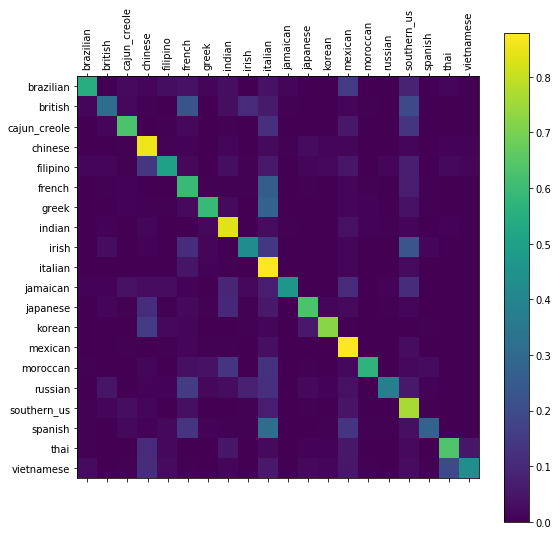

In [36]:
# 클래스 개수로 나누어주겠습니다. 그러면 클래스별 에러의 비율을 비교할 수 있습니다.
norm_confusion_mat = confusion_mat / confusion_mat.sum(axis=1, keepdims=True)
country_list = sorted(country_to_id, key=lambda x: country_to_id[x])

plt.figure(figsize=(9,9))
plt.matshow(norm_confusion_mat, 0)

plt.yticks(range(len(country_list)), country_list)
plt.xticks(range(len(country_list)), country_list, rotation=90)
plt.colorbar()
plt.show()

색이 밝을수록 해당 클래스를 잘 맞혔다는 의미입니다. 대각선이 밝은 것으로 보아, 올바르게 분류한 비율이 높다는 것을 알 수 있습니다. 이번에는 대각선을 0으로 만들어, 어디서 오류를 낸 것인지에 집중해보겠습니다.

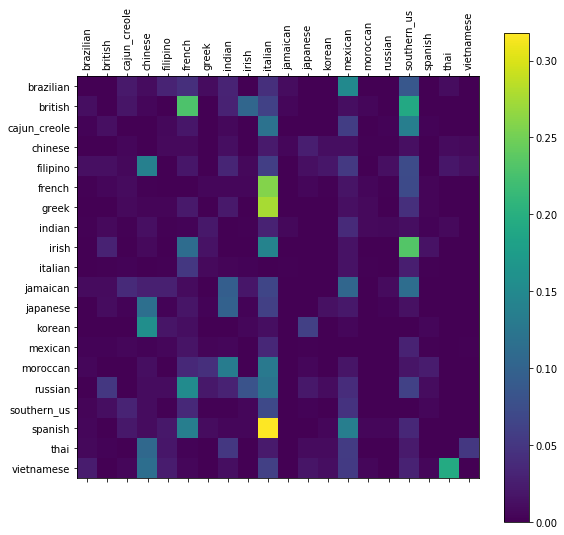

In [37]:
np.fill_diagonal(norm_confusion_mat, 0)

plt.figure(figsize=(9,9))
plt.matshow(norm_confusion_mat, 0)

plt.yticks(range(len(country_list)), country_list)
plt.xticks(range(len(country_list)), country_list, rotation=90)
plt.colorbar()
plt.show()

스페인 음식을 잘못 분류한 오류 중에서 이탈리아 음식으로 분류한 경우가 30%나 됩니다. 한국 음식의 경우 중국이나 일본 음식과 혼동하는 경우가 많습니다.

# 번외) 식재료 간 유사도 구하기

몇 가지 식재료에 대해 그것과 가장 유사한 식재료가 무엇인지 알아보겠습니다.

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_train.T)

In [40]:
def most_similar(query, word_to_id, id_to_word, similarity_matrix, top=5):
    print('\n[query] ' + query)
    query_id = word_to_id[query]  
    similarity = similarity_matrix[query_id]
    
    count = 0
    for i in (-similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(id_to_word[i])
        
        count += 1
        if count >= top:
            return
        
id_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}
most_similar('garlic', vectorizer.vocabulary_, id_to_word, similarity_matrix)
most_similar('kimchi', vectorizer.vocabulary_, id_to_word, similarity_matrix)
most_similar('grated parmesan cheese', vectorizer.vocabulary_, id_to_word, similarity_matrix)
most_similar('baking powder', vectorizer.vocabulary_, id_to_word, similarity_matrix)



[query] garlic
onions
salt
olive oil
soy sauce
ginger

[query] kimchi
Gochujang base
kimchi juice
silken tofu
pork belly
spam

[query] grated parmesan cheese
olive oil
shredded mozzarella cheese
ricotta cheese
lasagna noodles
butter

[query] baking powder
all-purpose flour
baking soda
buttermilk
large eggs
salt
